<div style="font-size: 3em; font-weight: bold; text-align: center;">Estadísticos básicos</div>
<div style="text-align: right; font-size: 24px; margin-right: 10px;">Guillermo Díaz Aguado</div>

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt

# 2. Linear Regression.
* $N$: número entero positivo
* $p$: Número de variables independientes
* $\beta_0$: Intercept
* $\beta_1 ... \beta_N$: Pesos
* $\epsilon$: Ruido => Rango de valores aleatorio
* $\overline{x}$: Valor medio
* $\hat{y}$: Valor estimado -> No es el valor real, es el que nosotros estimamos que podría ser


## 2.1. Least Squares Method (Mínimos Cuadrados)
* Caso para $p=1$.
El método de mínimos cuadrados se basa en minimizar la suma:
$$
L := \sum^N_{i=1}(y_i - \beta_0 - \beta_1x_i)^2
$$ 
Lo cual significa minimizar las distancias entre el *valor predicho* y el *valor visualizado*. 
Si diferenciamos parcialmente $L$ en función de $\beta_0$ y $beta_1$ y lo igualamos a 0: 
$$
\frac{\partial L}{\partial \beta_0} = -2\sum^{N}_{i=1} (y_i - \beta_0 - \beta_1x_i) = 0 \\
\frac{\partial L}{\partial \beta_1} = -2 \sum^{N}_{i=1} x_i(y_i - \beta_0 - \beta_1x_i) = 0 
$$ 

Si resolvemos esas dos ecuaciones nos da el siguiente resultado:

$$
\hat{\beta_1} = \frac{\sum^N_{i=1}(x_i - \overline{x})(y_i - \overline{y})} {\sum^N_{i=1}(x_i-\overline{x})^2}\\
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{x}
$$

Tendremos los valores de los pesos y del bias que minimizarán la distancia entre los puntos y la recta creada.

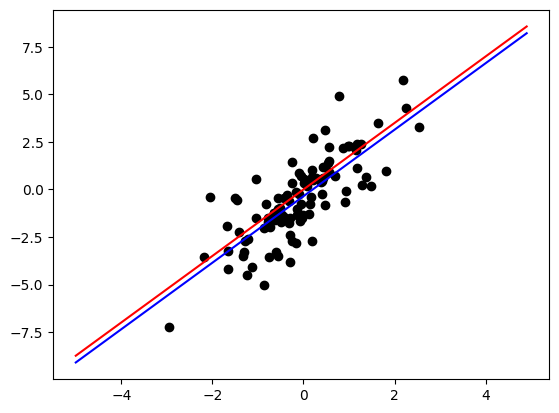

In [4]:
def min_sq(x, y): 
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot((x - x_bar), (y - y_bar))/np.linalg.norm(x-x_bar)**2
    beta_0 = y_bar - beta_1*x_bar

    return [beta_0, beta_1]

N = 100

#np.random.normal -> Función que nos da N puntos con media=loc y stdv =size
a = np.random.normal(loc=2, scale=1, size=N)  
# np.randn (genera una lista con un tamaño deseado de números aleatorios con media=0, stdv=1)
b = randn(1)
x = randn(N)
y = x*a + b + randn(N)

b1, a1 = min_sq(x, y)
xx = x-np.mean(x)
yy = y-np.mean(y)
b2, a2 = min_sq(xx, yy)


x_seq = np.arange(-5, 5, 0.1)
y_pre = x_seq*a1 + b1 
yy_pre = x_seq*a2 + b2

plt.scatter(x, y, color="black")

plt.plot(x_seq, y_pre, color="b")
plt.plot(x_seq, yy_pre, c="r")
plt.show()


## 2.2. Multiple Regression
Extendemos el problema de regresión a uno con múltiples covariates ($p>1$). En este caso, tendremos como variables independientes, variables dependientes y pesos:
$$
y:=\begin{bmatrix}
    y_1 \\
    \vdots\\
    y_N
    \end{bmatrix}
X:=\begin{bmatrix}
    x_{1,1}&\cdots & x_{1,p} \\
    \vdots & \ddots & \vdots\\
    x_{N,1}&\cdots & x_{N,p}
    \end{bmatrix}
\beta:=\begin{bmatrix}
    \beta_0 \\
    \beta_1 \\
    \vdots\\
    \beta_p
    \end{bmatrix}
$$

En este caso lo que deberemos minimizar será la función:
$$
L = ||y-X\beta||^2
$$
Que nos quedará de la siguiente manera:
$$
\nabla L:= \begin{bmatrix} 
            \frac{\partial L}{\partial{\beta_0}}\\
            \vdots\\
            \frac{\partial L}{\partial{\beta_p}}
            \end{bmatrix} = -2 X^T (y-X\beta)
$$
Como esto lo tenemos que igualar a 0. Podemos decir que los pesos tendrán la siguiente forma:
$$
\hat{\beta} = (X^TX)^{-1} X^T y
$$

Es importante destacar que $X^TX$ no puede ser invertible o nos dará valores erróneos si:
* $N<p+1$
* Dos columnas de X coinciden


## 2.3. Distribución de $\hat\beta$
Hemos asumido que nuestros datos provienen de una distribución de valores parecida a la siguiente:
$$
y = X\beta + \epsilon
$$
Donde:
* $\beta$ es diferente de nuestro $\hat\beta$
* $\epsilon$ es el ruido

El **ruido** $\epsilon$ es una variable independiente totalmente aleatoria con una media en 0 y una varianza $\sigma ^2$ desconocida. Su función de densidad será:
$$
f_i(\epsilon_i)=\frac{1}{(2\pi\sigma^2)^{N/2}}\epsilon^{-\frac{\epsilon^T\epsilon}{2\sigma^2}}
$$


<div style="border: 1px solid black; text-align:center ">
    Proposición: <i> Dos variables son independientes si su covarianza es 0 </i>
    
</div>


## 2.4. Probar la hipótesis de que $\hat\beta_j \neq 0$
Para probar dicha hipótesis construiremos un T-estadístico con una *t-distribution*, la cual tendrá $N-p-1$ grados de libertad. Si el valor de nuestro T-estadístico está por debajo de la afirmación de $\beta_j =0$ entonces podremos negar la hipótesis.

## 2.6. Coeficiente de determinación y detección de la colinealidad.
### RSS: Residual Sum of Squares.
$$
RSS = || \hat y - y ||^2
$$
### ESS: Explained Sum of Squares.
Califica como de bien el modelo predice los valores
$$
ESS = || \hat y - \overline x ||^2 
$$
## TSS: Total Sum of Squares.
$$
TSS = || y - \overline y ||^2
$$

### Relación entre $RSS, ESS, TSS$
La relación entre estas 3 mediciones es:
$$
TSS = RSS + ESS
$$
Si $RSS$ es mucho menor que $TSS$ podemos esperar que una regresión lineal pueda ser buena aproximación para nuestro problema.

### Coeficiente de determinación. $R^2$
Nos referimos a $R^2$ como el **coeficiente de determinación**. Este coeficiente expresa la <u> correlación entre las variables indepiendientes y la variable dependient </u>.
$$
R^2 = \frac{ESS}{TSS} = 1 - \frac{RSS}{TSS}
$$
Habrá veces que usemos el **coeficiente de determinación ajustado**. En el caso de que $p$ es muy grande, el coeficiente ajustado será más pequeño que el no-ajustado.
$$
R^2_{ajustado}=1 - \frac{\frac{RSS}{N-p-1}}{\frac{TSS}{N-1}}
$$

In [7]:
def R2(x, y):
    n = x.shape[0]
    xx = np.insert(x, 0, 1, axis=1)
    beta = np.linalg.inv(xx.T@xx)@xx.T@y
    y_hat = xx @ beta
    y_mean = np.mean(y)

    RSS = np.linalg.norm(y-y_hat)**2
    TSS = np.linalg.norm(y-y_mean)**2

    return 1 - RSS/TSS

N = 100
m = 2
x = randn(N, m)
y = randn(N)
R2(x, y)


np.float64(0.08263243909669149)

# 3. Clasificación.
## 3.1. Regresión logística.
Queremos crear una regla de decisión para las $p$ variables dada una respuesta que solo puede ser -1 o 1 y que minimice la probabilidad de error.
Asumiremos que la probabilidad de $y$ es una **función sigmoidal**.
$$
P(y) = \frac{1}{1 + e^{-(\beta_0+x\beta)}}
$$

Y donde como podemos ver en sus derivadas:
$$
f´(x) = \beta \frac{e^{-(\beta_0+x\beta )}}{(1+e^{-(\beta_0+x\beta)^2})}
$$
$$
f´´(x) = -\beta^2 \frac{e^{-(\beta_0+x\beta )}*[1-e^(\beta_0+x\beta)]}{(1+e^{-(\beta_0+x\beta)^3})}
$$

Es una función que crece monótonamente
def sigmoid(x):
    return 1/(1+np.exp(beta_0+x*beta))


## 3.4 k-Nearest Neighbor Method
Este método se basa en hacer un conteo de las $k$ muestras más cercanas de training a nuestro nuevo dato. El valor de $y$ con mayoría de las muestras más cercanas será el valor predicho para este nuevo dato. 


In [ ]:
def knn_1(x, y, z, k):
    x = np.array(x)
    y = np.array(y)
    dis = []
    for i in range(x.shape[0]):
        dis.append(np.linalg.norm(z-x[i,]))

    S = np.argsort(dis)[:k]
    u = np.bincount(y[S])
    m = [i for i, x in enumerate(u) if x==max(u)]
    while (len(m)>1):
        k = k-1
        S = S[:k]
        u = np.bincount(y[S])
        m = [i for i, x in enumerate(u) if x==max(u)]

    return y[m[0]]


## 3.5 ROC Curves 
Aunque minimizar la probabilidad de error es válido en muchos casos, tal vez en otros casos queramos mejorar la performance de otros valores.

Por ejemplo, a la hora de dar créditos a personas, tan solo el 3% tiene problemas en devolver lo dado, por ello si queremos tener un error del 3% tan solo tendríamos que darle el crédito a todas las personas. O a la hora de hablar de cáncer, tan solo el 3% de las personas tiene cáncer, pero más del 20% que han sido cribado, tiene al final cáncer. Nadie quiere saber que ha tenido cáncer y no se lo han diagnosticado porque solo hay 3% de la población con cáncer. Pero tampoco nadie quiere que le diagnostiquen cáncer cuando tiene una muy pequeña posibilidad de tenerlo. 

En otras palabras debemos crear un balance de los **False positves** (hemos dicho que tiene cáncer cuando no lo tiene) y los **False negatives** (hemos dicho que está sano pero en verdad tiene cáncer)

|     | Sick | Healthy |
|-----|------|---------|
| Treating as sick | True positive | False positive |
| Treating as healthy | False Negative | True negative| 

$$
False Positive Rate = \frac{FP}{FP+TN} = \alpha
$$
$$
Power = \frac{TP}{TP + FN} = 1 - \beta
$$


Para cada *false positive rate* intentaremos maximizar el *power*. Pero para tal caso habrá infinitas formas de elegir dependiendo del balance de estos 2. Para elegir bien usaremos la **Curva ROC**, la cual tiene el *power* en el eje vertical y el *false positive rate* en el eje horizontal. Cuanto mayor vaya la curva hacía el margen superior izquierdo, mejor *performance* tendrá el test. 

Para medir cómo de bien actúa una *Curva ROC* tenemos el **AUC**: el cual representa el área bajo la curva ROC.
* Cuanto mayor sea este valor: Mejor performance
* Cuanto más se acerque a 0,5 : Estamos tirando una moneda al aire -> El peor performance
* Cuanto menor sea : Buen performance pero lo estamos haciendo al revés


# 5. Information Criteria
$p$: Número de variables iniciales de nuestra base de datos.
$k$: Número de variables usadas para nuestros cálculos.
## 5.1. AIC, BIC
El **criterio de información** generalmente es definido como un índice para evaluar la validez de un modelo estadístico para los datos observados. Los *criterios de información* sirve para explicar:
* **Fitness**: Como el modelo estadístico explica los datos.
* **Simplicity**: Como de simple es el modelo.

También se puede conseguir esta evaluación mediante *cross-validation*, el cuál es superior en cuanto a **versatilidad** pero no controla explícitamente el balance entre **fitness** y **simplicity**.

Estos métodos son usados para tener una idea de cuantas variables usar de las $p$ disponibles. Sabemos que casi siempre habrá unas variables que expliquen mejor la variable dependiente y otras que influyen poco, usualmente estas últimas variables las usará el modelo para explicar la aleatoriedad implícita de nuestra base de datos.

Para saber como de bien está un modelo prediciendo podemos usar el RSS. Pero cuantas más variables, menor es RSS, es por ello que le sumaremos una penalización al uso de más variables. Esta penalización estará en función del número de variables usadas $k$.

$$
AIC:= N\ \text{log}\ \hat\sigma_k^2+2k
$$
$$
BIC:= N\ \text{log}\ \hat\sigma_k^2+k\ \text{log}\ N
$$

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import itertools

res = LinearRegression()

def RSS_min(X, y, T):
    S_min = np.inf
    m = len(T)
    for j in range(m):
        q = T[j]
        res.fit(X[:, q], y)
        y_hat = res.predict(X[:, q])
        S = np.linalg.norm(y_hat-y)**2
        if S<S_min:
            S_min = S
            set_q = q 
    return S_min, set_q

def IC(X, y, k):
    n, p = X.shape
    T = list(itertools.combinations(range(p), k))
    S, set_q = RSS_min(X, y, T)
    AIC = n*np.log(S/n)+ 2*k
    BIC = n*np.log(S/n) + k*np.log(n)
    return AIC, BIC

boston = load_boston()
X = boston.data[:, [0,2,4,5,6,7,9,10,11,12]]
y = boston.target

n, p = X.shape
AIC_seq = []
BIC_seq = []

for i in range(n):
    AIC, BIC = IC(X, y, k)
    AIC_seq.append(AIC)
    BIC_seq.append(BIC)

x_seq = np.arange(1, p+1 , 1)
plt.plot(x_seq, AIC_seq, c="red", label="AIC")
plt.plot(x_seq, BIC_seq, c="blue", label="BIC")
plt.xlabel("num of variables")
plt.ylabel(IC)
